In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sys
from scipy.signal import butter, iirnotch, firwin, filtfilt, periodogram
#from utils.signal_processing import *
#from utils.plots import plot_signal_epoch

In [2]:
# make function once you figure it out
sess0 = pd.read_csv('test_sess0_data.txt',header=None)
sess0_md = pd.read_csv('test_sess0_metadata.txt',names=['start_time','category'])#header=None)

In [3]:
def data_from_files(data, metadata):
    sess_data = pd.read_csv(data,header=None)
    sess_metadata = pd.read_csv(metadata, names=['start_time','category'])
    category_instances = {}
    for i, row in sess_metadata.iterrows():
        start_time = row['start_time']
        category = row['category'].strip()
        end_time = sess_metadata.iloc[i + 1]['start_time'] if i < len(sess_metadata) - 1 else None

        instances = sess_data.loc[(sess_data[0] >= start_time) & (sess_data[0] < end_time)].iloc[:,[2,3,6,7]]

        if category not in category_instances:
            category_instances[category] = []
        category_instances[category].append(instances)
    return category_instances

In [4]:
def plot_emg(cat_dict, category, instance, electrode, lo=5, hi=100, plot=True):
    series = cat_dict[category][instance][electrode]
    signal = series - series.mean()
    signal = butter_notch(signal)
    if lo > 0 and hi > 0:
        signal = butter_band(signal, 250, lo, hi)
    if plot:
        plt.plot(signal)
        plt.title(f'{category}: {instance}, electrode {electrode}')
    return signal

In [5]:
def butter_band(chan_data, Fs, low, high):
    # Define the filter parameters
    nyquist_freq = 0.5 * Fs
    lowcut = low / nyquist_freq
    highcut = high / nyquist_freq
    order = 2

    # Create the filter coefficients
    b, a = butter(order, [lowcut, highcut], btype='band')

    # Apply the filter to the EEG data
    filtered_data = filtfilt(b, a, chan_data)
    return filtered_data

In [6]:
def butter_notch(chan_data, Fs=250, notch_freq=60.0):
    # Define the filter parameters
    Q = 30.0

    # Calculate the notch filter coefficients
    w0 = notch_freq / (Fs / 2)
    b, a = iirnotch(w0, Q)

    # Apply the filter to the EEG data
    notched_data = filtfilt(b, a, chan_data)
    return notched_data

In [7]:
sess0_data = 'test_sess0_data.txt'
sess0_metadata = 'test_sess0_metadata.txt'
cat_instances = data_from_files(sess0_data, sess0_metadata)

array([-14.79497898, 261.97651222, 162.66352185, ..., 385.35599479,
       369.14767187,  35.90336157])

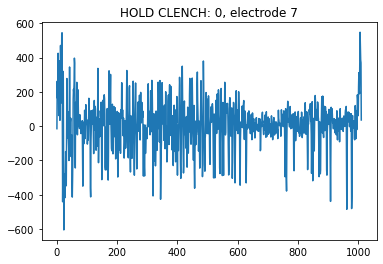

In [8]:
plot_emg(cat_instances, category='HOLD CLENCH', instance=0, electrode=7)

array([  2.1106187 ,  34.71888712, 219.10628692, ..., -64.09730457,
       -26.84724479,   5.04527888])

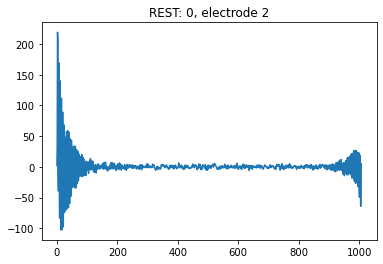

In [9]:
plot_emg(cat_instances, category='REST', instance=0, electrode=2)

array([-8.37742193e-01,  5.16459611e+02,  1.07523879e+02,  1.58186668e+02,
        2.29244724e+02, -5.79938753e+01, -2.70528462e+01,  1.46639660e+02,
        1.50437676e+02, -2.86039083e+01, -8.36994688e+01,  8.16579499e+01,
        1.29398048e+02, -2.84881329e+01, -1.04375117e+02,  3.00972653e+01,
        1.13552052e+02, -1.10291554e+01, -1.10528854e+02, -9.30692993e+00,
        9.27422352e+01,  5.43805462e+00, -1.03806573e+02, -3.66430209e+01,
        7.50661911e+01,  2.63868519e+01, -8.67136715e+01, -5.56207951e+01,
        5.52699187e+01,  3.93662887e+01, -6.74479510e+01, -6.47311838e+01,
        3.77665316e+01,  4.96894085e+01, -4.50956517e+01, -6.76161592e+01,
        2.35714363e+01,  5.77059925e+01, -2.55164686e+01, -6.43709371e+01,
        1.37377989e+01,  6.17826152e+01, -5.61397585e+00, -5.81953326e+01,
       -7.73789524e-01,  5.49607657e+01,  7.74445614e+00, -5.13686288e+01,
       -1.42645480e+01,  4.72402411e+01,  2.02344599e+01, -4.18442246e+01,
       -2.49958184e+01,  

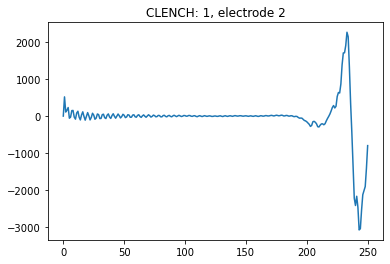

In [10]:
plot_emg(cat_instances, 'CLENCH', 1, 2)

In [11]:
sess0_md.head()

,start_time,category
0,2.331269e+06,REST
1,2.331273e+06,CLENCH
2,2.331274e+06,HOLD CLENCH
3,2.331278e+06,STOP CLENCH
4,2.331279e+06,REST


In [12]:
category_instances = {}
for i, row in sess0_md.iterrows():
    start_time = row['start_time']
    category = row['category'].strip()
    end_time = sess0_md.iloc[i + 1]['start_time'] if i < len(sess0_md) - 1 else None
    
    instances = sess0.loc[(sess0[0] >= start_time) & (sess0[0] < end_time)]
    
    if category not in category_instances:
        category_instances[category] = []
        
    category_instances[category].append(instances)


In [51]:
len(category_instances['REST'])

10

In [52]:
rest0 = category_instances['REST'][0]
rest0

,0,1,2,3,4,5,6,7,8
1251,2.331269e+06,187500.0,-112472.882812,-112405.875000,187500.0,-172796.000000,-172522.750000,-172340.015625,187500.0
1252,2.331269e+06,187500.0,-112494.585938,-112427.796875,187500.0,-174847.578125,-172735.328125,-172459.984375,187500.0
1253,2.331269e+06,187500.0,-112082.796875,-112016.304688,187500.0,-174330.734375,-171963.953125,-171832.859375,187500.0
1254,2.331269e+06,187500.0,-111995.203125,-111928.531250,187500.0,-172729.515625,-171603.890625,-171611.750000,187500.0
1255,2.331269e+06,187500.0,-112418.390625,-112351.312500,187500.0,-173066.515625,-172380.343750,-172232.062500,187500.0
...,...,...,...,...,...,...,...,...,...
2254,2.331273e+06,187500.0,-113717.203125,-113651.398438,187500.0,-173880.656250,-172526.187500,-172242.859375,187500.0
2255,2.331273e+06,187500.0,-113717.648438,-113651.937500,187500.0,-172179.000000,-172433.843750,-172150.921875,187500.0
2256,2.331273e+06,187500.0,-114117.703125,-114051.070312,187500.0,-172796.468750,-173044.640625,-172760.640625,187500.0
2257,2.331273e+06,187500.0,-114157.937500,-114091.593750,187500.0,-174766.078125,-173195.937500,-172911.703125,187500.0


In [53]:
rest0 = rest0.iloc[:,[2,3,6,7]]
rest0

,2,3,6,7
1251,-112472.882812,-112405.875000,-172522.750000,-172340.015625
1252,-112494.585938,-112427.796875,-172735.328125,-172459.984375
1253,-112082.796875,-112016.304688,-171963.953125,-171832.859375
1254,-111995.203125,-111928.531250,-171603.890625,-171611.750000
1255,-112418.390625,-112351.312500,-172380.343750,-172232.062500
...,...,...,...,...
2254,-113717.203125,-113651.398438,-172526.187500,-172242.859375
2255,-113717.648438,-113651.937500,-172433.843750,-172150.921875
2256,-114117.703125,-114051.070312,-173044.640625,-172760.640625
2257,-114157.937500,-114091.593750,-173195.937500,-172911.703125


In [37]:
mean_vals = rest_5.mean()
rest_5_ms = rest_5 - mean_vals

In [38]:
rest_5_ms

,0,1,2,3,4,5,6,7,8
13789,-2.026055,0.0,4907.535886,4906.194161,0.0,-767.011808,977.835621,970.529303,0.0
13790,-2.023456,0.0,4216.348386,4215.498849,0.0,-892.136808,6.991871,0.701178,0.0
13791,-2.019456,0.0,4310.559324,4309.514474,0.0,-2431.683683,103.960621,97.357428,0.0
13792,-2.015456,0.0,4691.707761,4689.983224,0.0,-1283.808683,855.569996,848.388678,0.0
13793,-2.011456,0.0,4578.379636,4577.061349,0.0,464.613192,863.851246,856.779303,0.0
...,...,...,...,...,...,...,...,...,...
14795,1.973167,0.0,-2206.964114,-2205.391776,0.0,1598.628817,112.335621,100.685553,0.0
14796,1.977167,0.0,-2201.573489,-2200.501151,0.0,-327.824308,7.304371,-4.376947,0.0
14797,1.981167,0.0,-1797.925051,-1797.071464,0.0,237.628817,667.085621,655.185553,0.0
14798,1.985167,0.0,-1736.698489,-1735.407401,0.0,1744.003817,874.538746,862.873053,0.0


In [39]:
rest_5_rms = np.sqrt(np.mean(rest_5**2))

/Users/aidantruel/opt/anaconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


In [40]:
rest_5_rms

0    2.331321e+06
1    1.875000e+05
2    1.238942e+05
3    1.238305e+05
4    1.875000e+05
5    1.761443e+05
6    1.737993e+05
7    1.738118e+05
8    1.875000e+05
dtype: float64

In [41]:
rest_5_rms_ms = np.sqrt(np.mean(rest_5_ms**2))

/Users/aidantruel/opt/anaconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


In [42]:
rest_5_rms_ms

0       1.166339
1       0.000000
2    1811.449309
3    1809.761198
4       0.000000
5    1153.111426
6     436.595678
7     423.991718
8       0.000000
dtype: float64